In [1]:
import transformers
import pandas as pd
import os, re

os.getcwd()

/home/barti/miniconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/home/barti/PosterRecognition/vit'

In [2]:
data = pd.read_csv("../scraper/data/movies_with_posters_and_rich_desc.csv")

In [3]:
data['imdb_id'] = data['imdb_id'].apply(lambda x: re.sub(r"^t+0*", "", x))
data['imdb_id']

0         57603
1       1733125
2         33045
3        113862
4         86250
         ...   
9766    1869716
9767      25601
9768     102592
9769      63443
9770      39464
Name: imdb_id, Length: 9771, dtype: object

In [4]:
import shutil

data = data.loc[data['poster_count'] > 3]

posters = os.listdir("../scraper/data/images")
valid_num_posters = set(data['imdb_id'].values)

for poster in posters:
    if poster not in valid_num_posters:
        shutil.rmtree("../scraper/data/images/" + poster)

len(os.listdir("../scraper/data/images")), len(data)

(4709, 4709)

In [5]:
def train_val_split(path: str) -> None:
    length = len(os.listdir(path))


In [6]:
from transformers import ViTModel


vit = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

In [7]:
from transformers import AutoImageProcessor
from torchvision import transforms
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import torch

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

torch.Size([3, 224, 224])

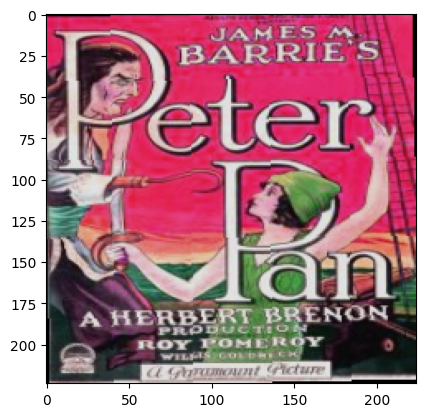

In [15]:
im = Image.open("/home/barti/PosterRecognition/scraper/data/images/15224/train/s_15224_3a23e5f7.jpg")

imtransformer = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.1,
                           contrast=0.1,
                           saturation=0.1,
                           hue=0.1),
    transforms.RandomRotation(degrees=7),
    transforms.ToTensor()
])

plt.imshow(imtransformer(im).permute(1, 2, 0))

image_tensor = imtransformer(im)
image_tensor.shape

In [10]:
res = processor(image_tensor.permute(1, 2, 0), return_tensors='pt')['pixel_values']
res.shape

torch.Size([1, 3, 224, 224])

In [11]:
id_mapping = {movie_id: title for movie_id, title in zip(data['imdb_id'].values, data['title'].values)}

assert id_mapping['15224'] == "Peter Pan"

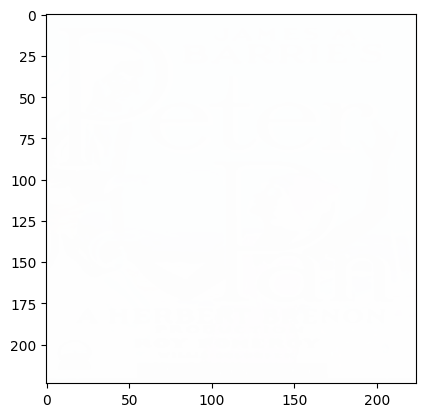

In [12]:
plt.imshow((-1*res[0]).permute(1, 2, 0))

In [13]:
data.groupby(['poster_count']).count()

,imdb_id,plot_synopsis,tags,adult,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,num_description_tokens,title
poster_count,,,,,,,,,,,,,,,,,,,,,
4.0,935,935,935,935,162,935,935,170,935,935,...,935,935,935,935,730,935,935,935,935,935
5.0,677,677,677,677,125,677,677,137,677,677,...,677,677,677,677,538,677,677,677,677,677
6.0,2568,2568,2568,2568,670,2568,2568,771,2568,2568,...,2568,2568,2568,2568,2104,2568,2568,2568,2568,2568
7.0,111,111,111,111,24,111,111,41,111,111,...,111,111,111,111,95,111,111,111,111,111
8.0,128,128,128,128,31,128,128,56,128,128,...,128,128,128,128,101,128,128,128,128,128
9.0,97,97,97,97,27,97,97,51,97,97,...,97,97,97,97,85,97,97,97,97,97
10.0,89,89,89,89,36,89,89,42,89,89,...,89,89,89,89,82,89,89,89,89,89
11.0,68,68,68,68,37,68,68,38,68,68,...,68,68,68,68,63,68,68,68,68,68
12.0,29,29,29,29,13,29,29,9,29,29,...,29,29,29,29,28,29,29,29,29,29


In [14]:
import random

l = [random.randint(0, 9) for _ in range(6)]

ll = len(l)

l[:int(ll*0.5)], l[int(ll*0.5):int(ll*0.8)], l[int(ll*0.8):]

([4, 4, 7], [5], [0, 0])

In [ ]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder("../scraper/data/images", transform=imtransformer)